# Построить коэффициенты Риджа как функцию регуляризации

Показывает эффект коллинеарности коэффициентов оценщика.

Ridge Регрессия является оценкой, используемой в этом примере. Каждый цвет представляет другую характеристику вектора коэффициентов, и это отображается как функция параметра регуляризации.
Этот пример также показывает полезность применения регрессии Риджа к очень плохо обусловленным матрицам. Для таких матриц небольшое изменение целевой переменной может привести к огромным расхождениям в рассчитанных весах. В таких случаях полезно установить определенную регуляризацию (альфа), чтобы уменьшить эту вариацию (шум).
Когда альфа очень велика, эффект регуляризации доминирует над квадратом функции потерь, и коэффициенты стремятся к нулю. В конце пути, когда альфа стремится к нулю, а решение стремится к обычному методу наименьших квадратов, коэффициенты демонстрируют большие колебания. На практике необходимо настроить альфу таким образом, чтобы поддерживать баланс между ними.


In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import linear_model

# X is the 10x10 Hilbert matrix
X = 1.0 / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

## Вычислить пути

In [2]:
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

## Показать результаты 

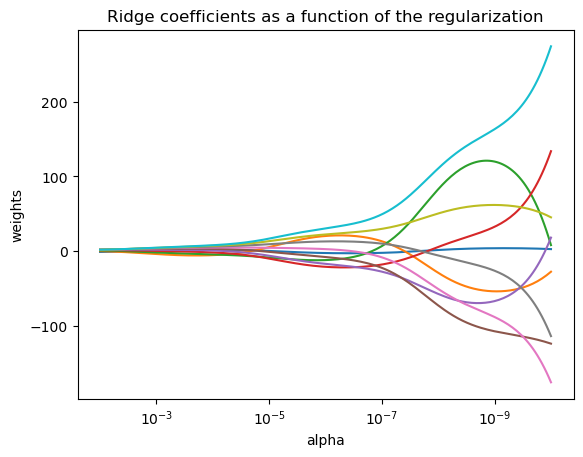

In [3]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()